# Enhance Model Accuracy

## Members: Tyler, Humza, Christine, Angelina, Nathan, Efaz

In [ ]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

# Data Exploration and Processing

### Exploratory Data Analysis (EDA)

In [ ]:
# Loading in data set, checking dataset size and looking at the first 5 columns
churn = pd.read_csv('Churn.csv')
print("Size of Churn Set: ", churn.shape)
churn.head(10)

Size of Churn Set:  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# Dropping the first two columns as it doesn't offer much outside of being labels for each customer
churn = churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
churn.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_types = churn.dtypes

print("Data Types and Additional Information:")
for column in churn.columns:
  print(f'Column: {column}')
  print(f' - Data Type: {data_types[column]}')
  print(f' - Number of Unique Values: {churn[column].nunique()}')
  print(f' - Sample Values: {churn[column].dropna().unique()[:5]}')

Data Types and Additional Information:
Column: CreditScore
 - Data Type: int64
 - Number of Unique Values: 460
 - Sample Values: [619 608 502 699 850]
Column: Geography
 - Data Type: object
 - Number of Unique Values: 3
 - Sample Values: ['France' 'Spain' 'Germany']
Column: Gender
 - Data Type: object
 - Number of Unique Values: 2
 - Sample Values: ['Female' 'Male']
Column: Age
 - Data Type: int64
 - Number of Unique Values: 70
 - Sample Values: [42 41 39 43 44]
Column: Tenure
 - Data Type: int64
 - Number of Unique Values: 11
 - Sample Values: [2 1 8 7 4]
Column: Balance
 - Data Type: float64
 - Number of Unique Values: 6382
 - Sample Values: [     0.    83807.86 159660.8  125510.82 113755.78]
Column: NumOfProducts
 - Data Type: int64
 - Number of Unique Values: 4
 - Sample Values: [1 3 2 4]
Column: HasCrCard
 - Data Type: int64
 - Number of Unique Values: 2
 - Sample Values: [1 0]
Column: IsActiveMember
 - Data Type: int64
 - Number of Unique Values: 2
 - Sample Values: [1 0]
Column:

<ipython-input-5-c61476b88c26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn.corr()


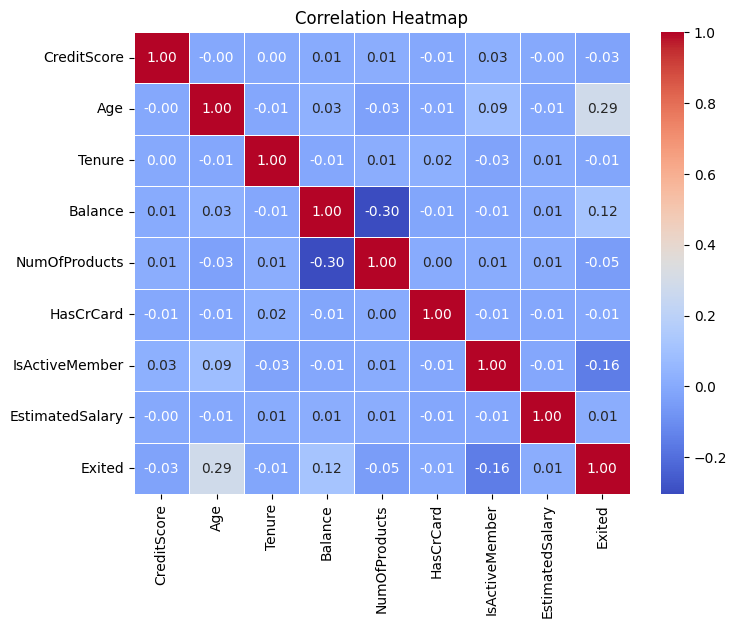

In [ ]:
# Creating a correlation matrix to see what variables are highly/not correlated with each other
correlation_matrix = churn.corr()

# Creating a correlation heatmap to visualize the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Negative Correlation exists between NumOfProducts and Balance, so we should keep this in mind.

### Data Preprocessing

Number of Duplicated Entries:  0
Missing values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


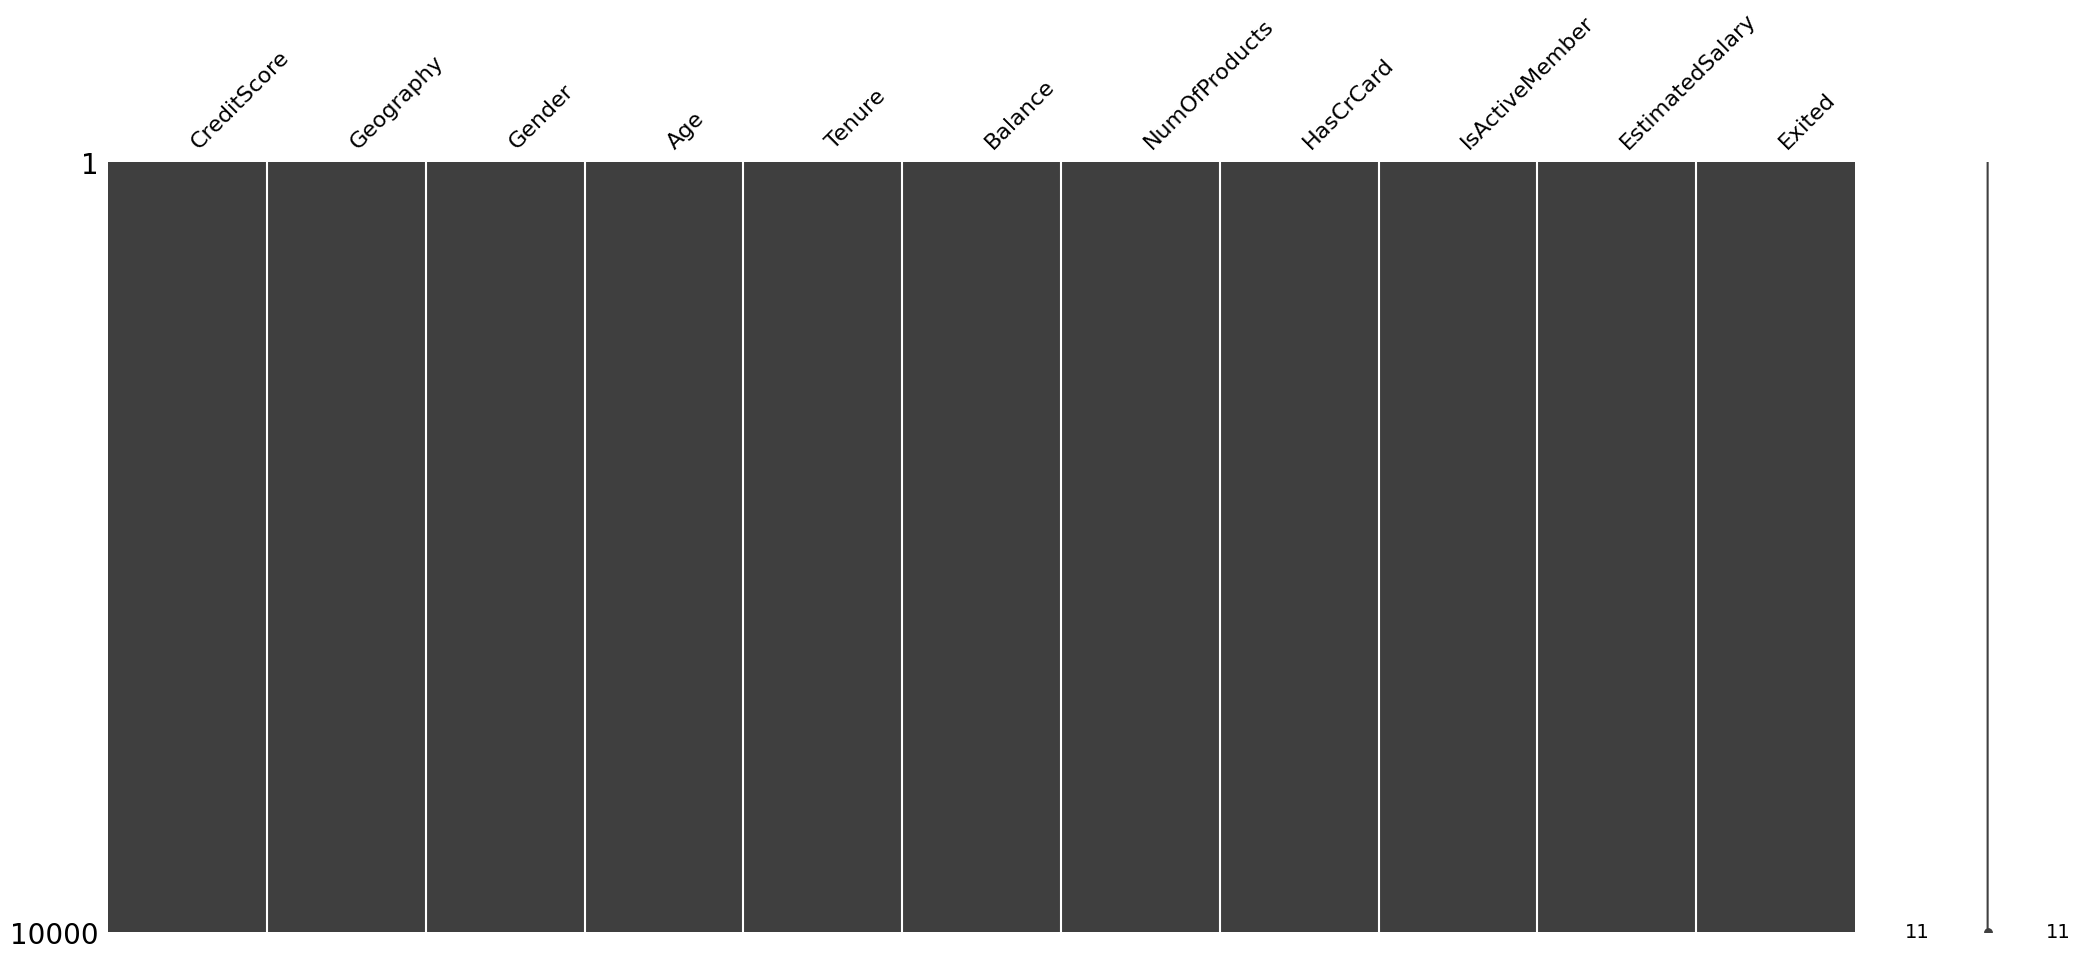

In [ ]:
# Checking duplicated records
duplicates = churn.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

#Checking for Missing Values
missing_values = churn.isnull().sum()
print("Missing values:\n", missing_values)
ms.matrix(churn)
plt.show()

No missing entries, duplicated entries or null values found, let's balance the dataset's Balance column as it has some zero-values.

In [ ]:
# Calculate the mean of non-zero values in the 'Balance' column
balance_mean = churn[churn['Balance'] != 0]['Balance'].mean()
print('Mean of Balance Category: ',balance_mean)

# Replace zeros with the mean value
churn['Balance'] = churn['Balance'].replace(0, balance_mean)

Mean of Balance Category:  119827.49379288736


Now that we know the mean and have replaced zero-values with the mean, let's check up on the new updated churn dataframe and see how it looks.

In [ ]:
churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.780000,2,1,0,149756.71,1
6,822,France,Male,50,7,119827.493793,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.740000,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.070000,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.880000,1,1,1,71725.73,0


Nice! We successfully balanced the dataset with the mean, let's now proceed on selecting two models and starting the machine learning process.

# Model Selection and Implementation

In [ ]:
# Machine Learning Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
X =  churn.drop(columns=['Exited']) # setting up our X set that uses every column except Exited
y =  churn['Exited'] # sets up the y set that only contains the Exited variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splits the X and y sets into train/test containing 20% of the dataset randomly

### K-Nearest Neighbor

What is K-Nearest Neighbor (KNN)
- K-Nearest Neighbors (KNN) is a straightforward and intuitive machine learning algorithm used for classification and regression tasks. It operates on the principle that similar data points tend to have similar labels or values. KNN assigns a label or value to a new data point by examining the 'k' closest data points in the training set and taking a majority vote (for classification) or averaging (for regression).

Why are we using it?
- It's particularly useful in scenarios where the underlying relationship between features and labels is complex or not easily captured by parametric models, and when interpretability is valued, as it doesn't require a complex training process.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define preprocessing steps for numerical and categorical columns
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale features
])

categorical_features = ['Geography', 'Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values with a constant value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Define the KNN classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Step 3: Create the pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])

# Step 4: Train the model
knn_pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_knn = knn_pipeline.predict(X_test)


### XGBoost

What is XGBoost?
- XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its efficiency and effectiveness in handling diverse data types and achieving high predictive accuracy. It works by iteratively building an ensemble of decision trees, each correcting the errors of its predecessors, using gradient boosting techniques. XGBoost incorporates regularization techniques to prevent overfitting and provides a wide range of hyperparameters for fine-tuning model performance.


Why are we using it?
- XGBoost is highly favored for its superior predictive performance across a wide array of data types, making it a go-to choice in machine learning tasks. Leveraging gradient boosting techniques, it constructs an ensemble of decision trees that continuously refine predictions by learning from past mistakes. Its efficiency, versatility in handling diverse data, and robust regularization mechanisms make it a cornerstone tool for achieving accurate and reliable predictive models in various domains.


In [ ]:
from xgboost import XGBClassifier
# Step 1: Define preprocessing steps for numerical and categorical columns
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale features
])

categorical_features = ['Geography', 'Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values with a constant value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Create the pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Step 3: Train the model
xgb_pipeline.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_xgb = xgb_pipeline.predict(X_test)


# Model Evaluation

### What Metrics are being considered?
- Accuracy and CV Accuracy:
  - Accuracy measures the proprtion of correct predictions among total predictions
  - Cross-Validation Accuracy is a measure of how well the model performs across multiple subsets of the data using cross-validation
- Precision:
  - Measures the proportion of true positive prediction among all positive predictions
- Recall:
  - Measures the true positive predictions among all actual positive instances
- F1-Score:
  - Harmonic mean of precision and recall
  - Provides a balance between precision and recall and is especially useful when distribution is imbalanced

### KNN Evaluation

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5)  # Perform 5-fold cross-validation

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

print('\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Cross-validation scores: [0.8375 0.84   0.829  0.83   0.829 ]
Mean CV accuracy: 0.8331


Accuracy: 0.841
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.63      0.46      0.53       393

    accuracy                           0.84      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



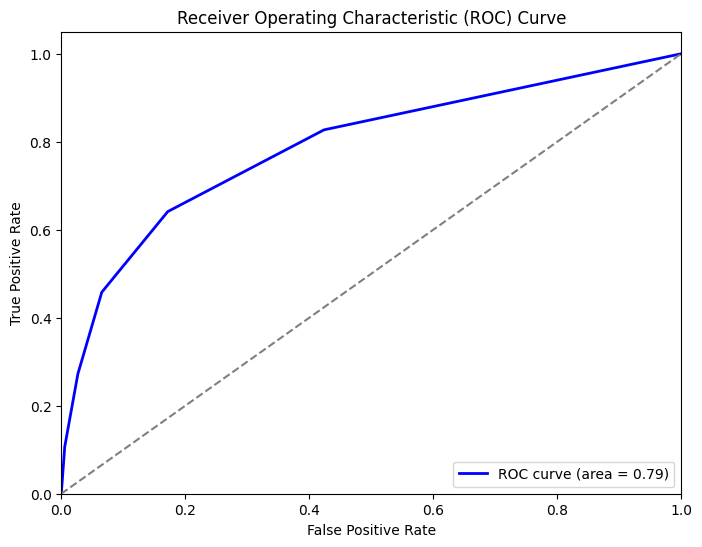

In [ ]:
# Step 1: Predict probabilities for the testing data
y_pred_proba = knn_pipeline.predict_proba(X_test)[:, 1]

# Step 2: Compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### XGBoost Evaluation

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(xgb_pipeline, X, y, cv=5)  # Perform 5-fold cross-validation

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

print('\n')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Cross-validation scores: [0.841  0.844  0.841  0.8475 0.8385]
Mean CV accuracy: 0.8423999999999999


Accuracy: 0.8565
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.51      0.58       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



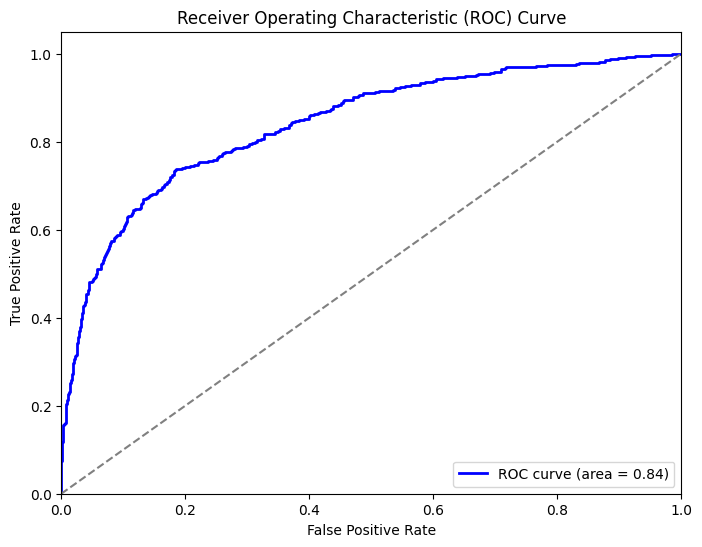

In [ ]:
# Step 1: Predict probabilities for the testing data
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Step 2: Compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Model Discussion

Out of the two models picked above, we found that on average, XGBoosting has the better score than KNN. We believe that this is likely because XGBoost is an ensemble learning model where it creates multiple subsets and then boosts each sample run until it can create a better overall model combined.

We can see this when we compare the accuracy score (0.841 vs 0.8565) and the recall score (0.84 vs 0.86). With this comparison, let's improve upon the original XGBoost model by doing some hyperparameter tuning using GridSearchCV and RandomSearchCV

# Model Improvement with Hyperparameter Tuning

### Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees
    'classifier__max_depth': [3, 5, 7],            # Maximum depth of each tree
    'classifier__learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predict on testing data with best model
y_pred_grid = grid_search.predict(X_test)

# Generate classification report with best model
print("Classification report with best model:")
print(classification_report(y_test, y_pred_grid))

Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Classification report with best model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.47      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



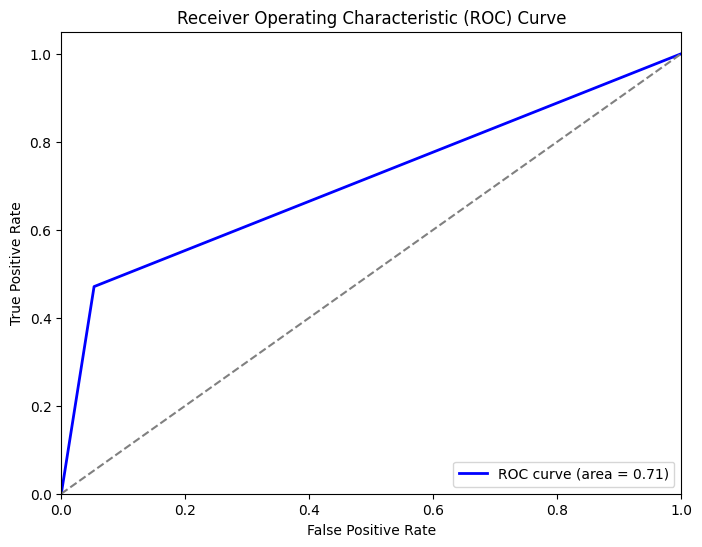

In [ ]:
# Step 1: Predict probabilities for the testing data
y_pred_proba = y_pred_grid

# Step 2: Compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'classifier__n_estimators': randint(100, 1000),  # Number of trees
    'classifier__max_depth': randint(3, 10),         # Maximum depth of each tree
    'classifier__learning_rate': uniform(0.01, 0.3)  # Learning rate
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", random_search.best_params_)

# Predict on testing data with best model
y_pred_random = random_search.predict(X_test)

# Generate classification report with best model
print("Classification report with best model:")
print(classification_report(y_test, y_pred_random))


Best parameters found: {'classifier__learning_rate': 0.027425083650459835, 'classifier__max_depth': 7, 'classifier__n_estimators': 199}
Classification report with best model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.71      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



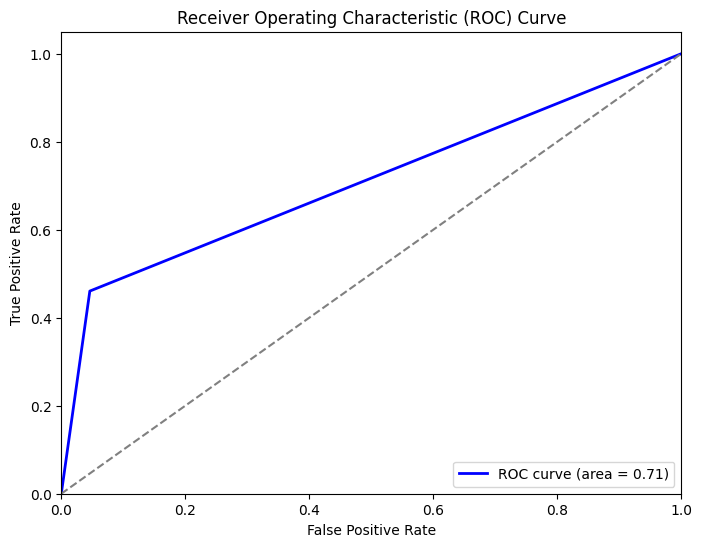

In [ ]:
# Step 1: Predict probabilities for the testing data
y_pred_proba = y_pred_random

# Step 2: Compute the False Positive Rate (FPR) and True Positive Rate (TPR) at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 3: Calculate the Area Under the ROC Curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Comparison between Initial Model and Hyperparameter Tuned Models

## Initial XGB Model:
- Mean CV accuracy: 0.8423999999999999
- Accuracy: 0.8565
- Precision: 0.85
- Recall: 0.86
- F1-Score: 0.85
- AUC-ROC: 0.84


## GridSearch:
- Mean CV Accuracy: 0.85
- Precision: 0.85
- Recall: 0.85
- F1-Score: 0.84
- AUC-ROC: 0.71

## RandomizedSearchCV:
- Mean CV Accuracy: 0.86
- Precision: 0.85
- Recall: 0.86
- F1-Score: 0.84
- AUC-ROC: 0.71



When we compare the mean CV accuracy, the one that does the best seems to be RandomizedSearchCV. Counting in Precision, all three do relatively the same. However in Recall, our base XGB
and RandomizedSearchCV seems to do the best. But when we consider the AUC, our initial XGB model seems to do the best.